In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.abspath('../'))
import fastnc

## Define the bispectrum
Define the bispectrum as function of $\ell, \psi, \mu$, where
$$
\ell_1 = \ell \cos\psi,~ \ell_2 = \ell\sin\psi, ~\ell_3 = \ell [1-\sin(2\psi)\mu]^{1/2}.
$$

Here we use a simple toy model, 1 halo term inspired by NFW profile.


In [3]:
bispectrum = fastnc.devtool.bispectrum_NFW

## Instantiate `fastnc`
Instantiate the `fastnc` with input of bispectrum, binning for `\ell` (lmin, lmax, and nbin used for defininf logarithmic bin) and the highest multipoles to keep, Lmax and Mmax.

In [4]:
nc = fastnc.fastnc.NaturalComponentsCalcurator(bispectrum, lmin=50.0*1e-3, lmax=50*1e3, \
                                                Lmax=10, Mmax=40, nbin=200)

### Prepare for $\Gamma^{(0)}$
This is perfoming 2DFFTLog for various $M<M_{\rm max}$

In [5]:
nc.compute_FM(0)

### Plot $\Gamma^{(0)}$

-0.7104080957781965


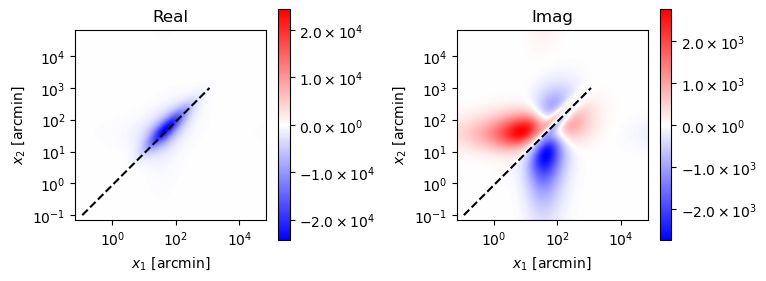

In [6]:
r_arcmin = np.logspace(-1, 3, 100)
r = np.deg2rad(r_arcmin/60.0)
u = 0.95
v = 0.15

# Convert (r,u,v) convention to (x1,x2,dvarphi) convention
x1, x2, dvphi = fastnc.trigutils.ruv_to_x1x2dvphi(r_arcmin, u, v)
print(dvphi/np.pi)

# Get Gamma0
g0 = nc.Gamma0(dvphi)

# plot
fig, axes = fastnc.devtool.imshow_g0(nc.x12_1d, nc.x12_1d, g0)
axes[0].plot(np.log10(x1), np.log10(x2), 'k--')
axes[1].plot(np.log10(x1), np.log10(x2), 'k--')
plt.show()

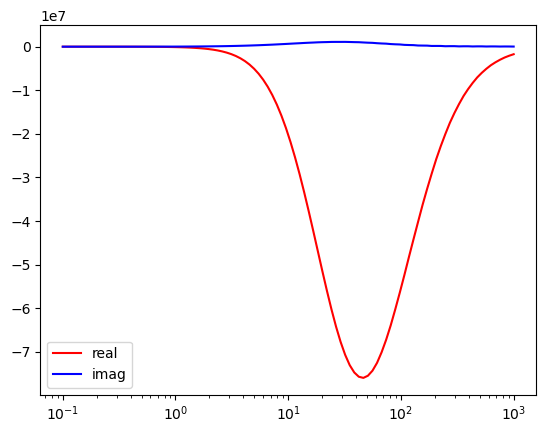

In [8]:
r_arcmin = np.logspace(-1, 3, 100)
r = np.deg2rad(r_arcmin/60.0)
u = 0.95
v = 0.15

g0 = nc.Gamma0_treecorr(r, u, v)

plt.figure()
plt.xscale('log')
plt.plot(r_arcmin, r_arcmin*g0.real, label='real', color='red' )
plt.plot(r_arcmin, r_arcmin*g0.imag, label='imag', color='blue')
plt.legend()
plt.show()